In [5]:
from model import *
from helpers import *

In [52]:
# simulate entering snowball to get initial snowball conditions

results = run_model(C_imb=10,
                    dt=1e2/1e6, t_max=5,
                    verbose=False)

# find beginning of snowball
snowball = results['snowball']
entry_idx = np.where(snowball==True)[0][0]

# get initial condition
T_snow = results['T'][entry_idx]
print(f"T = {T_snow:0.1f} K")


T = 238.3 K


In [53]:
t_max = 80
results = run_model(T0=T_snow,
                    V_C=6.5, # conservatively low --> conservatively long Snowball
                    V_red=1.3
                    )
results_canon = results

t = results['t']
T = results['T']
snowball = results['snowball']
pO2 = results['pO2']
pO2_ppm = pO2*201000

times = get_times(t,snowball,return_dict=True)
deglaciation_time = times['snowball_ends'][0]
print(f"Deglaciation in {deglaciation_time:0.2f} Myr")
            
SMIF_threshold = 2.1 # ppm
try:
    SMIF_time = t[np.where(pO2_ppm<=SMIF_threshold)[0][0]]
    print(f"S-MIF in {SMIF_time:0.2f} Myr")
except:
    print("No S-MIF")

Deglaciation in 3.75 Myr
S-MIF in 2.84 Myr


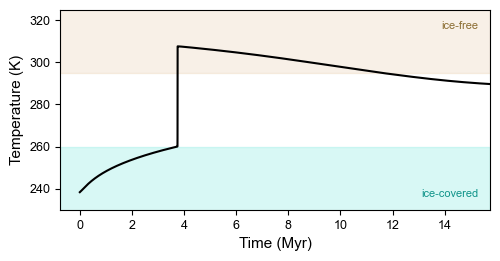

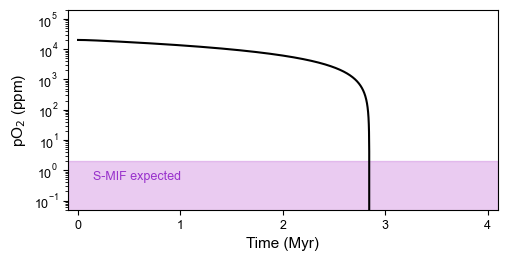

In [54]:
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'

# --- temperature fig ---

figT = plt.figure(figsize=(4.3, 2))
axT = figT.add_axes([0, 0, 1, 1])

axT.plot(t, T, c='k', alpha=1)
annotate_temp(axT, t_max=15, Sturtian=False)

axT.set_xlabel('Time (Myr)', fontsize=11)
axT.set_ylabel('Temperature (K)', fontsize=11)
axT.tick_params(labelsize=9)

figT.savefig("figs/canonical_temp.svg", format='svg', bbox_inches="tight", transparent=True)

# --- pO2 fig ---
figO2 = plt.figure(figsize=(4.3, 2))
axO2 = figO2.add_axes([0, 0, 1, 1])  # Full plot area used

mask = t <= 3.5
axO2.plot(t[mask], pO2_ppm[mask], c='k')
axO2.set_ylim(5e-2,2e5)

axO2.set_xlabel('Time (Myr)', fontsize=11)
axO2.set_ylabel('pO$_2$ (ppm)', fontsize=11)
axO2.set_yscale('log')
axO2.set_xlim(-0.1, 4.1)

# S-MIF annotation
SMIF_threshold = 2.1
axO2.axhspan(0, SMIF_threshold, color='mediumorchid', alpha=0.3)
axO2.text(0.15, 1, 'S-MIF expected', color='darkorchid',
          ha='left', va='top', fontsize=9)

# x axis format
axO2.set_xticks([0, 1, 2, 3, 4])
axO2.set_xticklabels(['0', '1', '2', '3', '4'])
axO2.tick_params(labelsize=9)

figO2.savefig("figs/canonical_pO2.svg", format='svg', bbox_inches="tight", transparent=True)


plt.show()
